In [1]:
## Load libraries ##
from SPARQLWrapper import SPARQLWrapper2, JSON, CSV

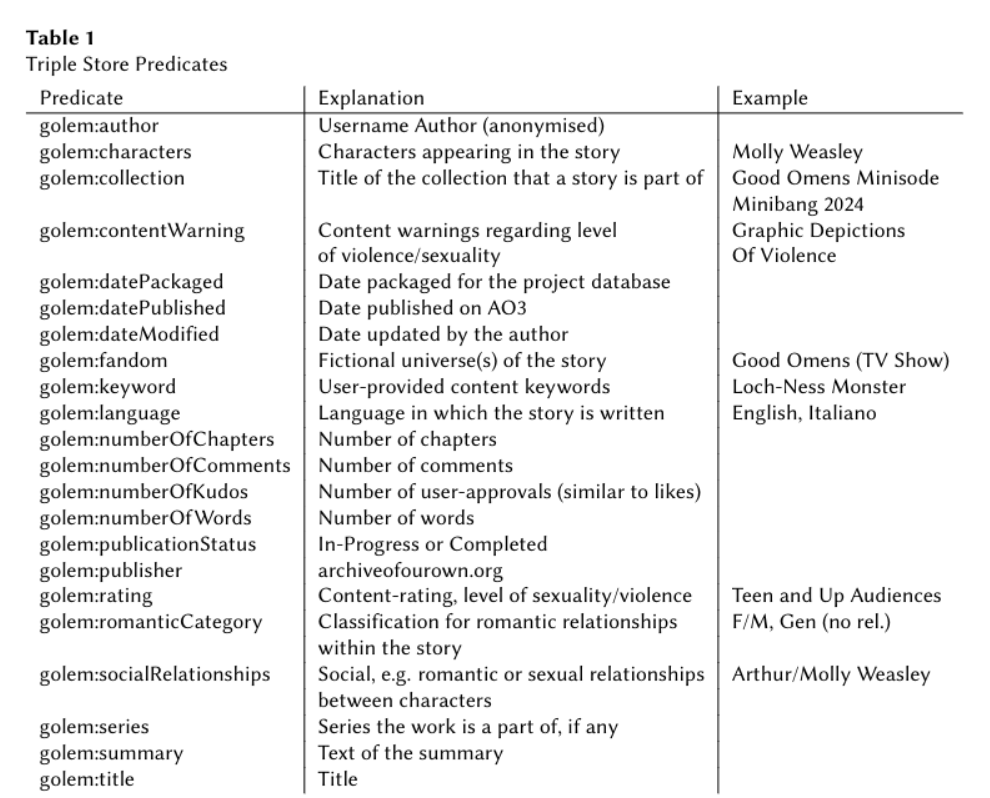

In [2]:
sparql = SPARQLWrapper2("http://graph.golemlab.eu:8890/sparql")

In [3]:
#Set query, e.g. get statistics how many stories we have for a given author#

sparql.setQuery("""
    prefix golem: <https://golemlab.eu/graph/> 
    SELECT DISTINCT ?predicate WHERE
    {
      ?subject ?predicate ?object .
    }

    """
)

In [4]:
query = sparql.query()

In [5]:
for result in query.bindings:
    print(f"{result['predicate'].value}")

http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.openlinksw.com/schemas/virtrdf#version
http://www.openlinksw.com/schemas/virtrdf#loadAs
http://www.openlinksw.com/schemas/virtrdf#item
http://www.openlinksw.com/schemas/virtrdf#isSpecialPredicate
http://www.openlinksw.com/schemas/virtrdf#isGcResistantType
http://www.openlinksw.com/schemas/virtrdf#qmfName
http://www.openlinksw.com/schemas/virtrdf#qmfShortTmpl
http://www.openlinksw.com/schemas/virtrdf#qmfLongTmpl
http://www.openlinksw.com/schemas/virtrdf#qmfSqlvalTmpl
http://www.openlinksw.com/schemas/virtrdf#qmfBoolTmpl
http://www.openlinksw.com/schemas/virtrdf#qmfIsrefOfShortTmpl
http://www.openlinksw.com/schemas/virtrdf#qmfIsuriOfShortTmpl
http://www.openlinksw.com/schemas/virtrdf#qmfIsblankOfShortTmpl
http://www.openlinksw.com/schemas/virtrdf#qmfIslitOfShortTmpl
http://www.openlinksw.com/schemas/virtrdf#qmf01uriOfShortTmpl
http://www.openlinksw.com/schemas/virtrdf#qmf01blankOfShortTmpl
http://www.openlinksw.com/schemas/virtrd

In [6]:
## Get a list of top 50 fandoms
sparql.setQuery("""
    prefix golem: <https://golemlab.eu/graph/> 
    SELECT ?o (COUNT(?o) AS ?oCount)  WHERE
    {
     ?s golem:fandom ?o .
    }
    GROUP BY ?o
    ORDER BY DESC(?oCount)
    LIMIT 50
    """
)

In [7]:
for result in sparql.query().bindings:
    print(f"{result['o'].value}, {result['oCount'].value}")

Harry Potter - J. K. Rowling, 324767
Marvel Cinematic Universe, 252605
Supernatural, 244182
My Hero Academia, 217763
Boku no Hero Academia, 217507
僕のヒーローアカデミア, 217288
Bangtan Boys, 171325
BTS, 171256
방탄소년단, 171242
The Avengers (Marvel Movies), 151492
Original Work, 138272
Haikyuu!!, 127449
Sherlock (TV), 122201
Teen Wolf (TV), 120612
Star Wars - All Media Types, 106233
Captain America (Movies), 92944
Naruto, 84947
Minecraft (Video Game), 84405
Video Blogging RPF, 82478
Voltron: Legendary Defender, 78801
Genshin Impact (Video Game), 72847
原神, 72846
Shingeki no Kyojin, 68474
Attack on Titan, 68421
One Direction (Band), 61378
Batman - All Media Types, 58933
The Avengers (Marvel) - All Media Types, 57267
Homestuck, 57108
Miraculous Ladybug, 54970
NCT (Band), 51860
Game of Thrones (TV), 51027
Once Upon a Time (TV), 50469
Marvel, 50078
Módào Zǔshī - Mòxiāng Tóngxiù, 48620
魔道祖师 - 墨香铜臭, 48477
Doctor Who (2005), 48367
Stranger Things (TV 2016), 47332
ジョジョの奇妙な冒険, 47229
JoJo's Bizarre Adventure, 

In [ ]:
for result in sparql.query().bindings:
    print(f"{result}")

In [ ]:
sparql.setQuery("""
    prefix golem: <https://golemlab.eu/graph/> 
    SELECT DISTINCT ?o WHERE
    {
     ?s golem:fandom "Ranma 1/2" .
     ?s golem:keyword ?o
    }
    GROUP BY ?o
    
    """
)

In [ ]:
#Convert the result to CSV file
import pandas as pd

In [ ]:
try :
    sparql.setReturnFormat(JSON)
    ret = sparql.query()
    d = ret.convert()
except Exception as e:
    print(e)

In [ ]:
## save results as csv file 
values = [value["o"].value for value in d.bindings]
df = pd.DataFrame(columns=["values"])
df["values"] = values
df.to_csv("results.csv", sep=";")